# Logistic Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import seaborn as sns
from sklearn import metrics
from mlxtend.evaluate import bias_variance_decomp

In [2]:
df = pd.read_csv(r'C:\Users\ACER\OneDrive\Desktop\crisis_data.csv')

In [3]:
df.head()

,CMR,RIRR,CDR_p,std_FII,REER,IIP,MCSI,Indian Sentiment,EURO_CCI,Emerging sentiment,pca_f1,crisis_indicator
0,7.24,10.39,51.084,-0.358586,95.00,159.0,92.6,NaN,-2.2,0.509225,NaN,1
1,7.19,10.39,51.236,-0.362663,95.05,160.4,92.4,0.796048,-3.0,0.197867,0.796048,1
2,6.94,10.38,51.182,-0.419626,93.56,162.2,91.5,0.811970,-5.5,0.153128,0.811970,1
3,7.30,10.38,50.977,-0.476136,91.82,161.7,81.8,0.419764,-8.6,-0.602136,0.419764,1
4,7.40,10.38,51.660,-0.381688,92.37,162.2,82.7,0.382706,-9.0,-1.297369,0.382706,1


In [4]:
df1 = df.dropna()
df1

,CMR,RIRR,CDR_p,std_FII,REER,IIP,MCSI,Indian Sentiment,EURO_CCI,Emerging sentiment,pca_f1,crisis_indicator
1,7.19,10.39,51.236,-0.362663,95.05,160.400,92.4,0.796048,-3.0,0.197867,0.796048,1
2,6.94,10.38,51.182,-0.419626,93.56,162.200,91.5,0.811970,-5.5,0.153128,0.811970,1
3,7.30,10.38,50.977,-0.476136,91.82,161.700,81.8,0.419764,-8.6,-0.602136,0.419764,1
4,7.40,10.38,51.660,-0.381688,92.37,162.200,82.7,0.382706,-9.0,-1.297369,0.382706,1
5,6.97,10.38,51.683,-0.431856,94.01,167.000,83.9,0.493920,-11.1,-1.558114,0.493920,1
...,...,...,...,...,...,...,...,...,...,...,...,...
206,6.36,5.94,75.394,-0.470700,119.77,238.346,96.2,1.999852,-1.9,1.421373,1.999852,0
207,6.46,5.92,76.117,-1.055508,115.03,228.910,100.1,3.460565,-1.9,1.344099,3.460565,0
208,6.45,5.88,76.746,-3.369031,113.68,226.227,98.6,1.750917,-2.7,1.151050,1.750917,0
209,6.40,5.89,77.104,0.310025,116.92,232.665,97.5,2.569462,-3.9,1.099882,2.569462,0


In [5]:
X = df1.iloc[:, :-1].values
Y = df1.iloc[:, 11].values

In [6]:
from sklearn.model_selection import train_test_split
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

In [7]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_Train = sc_X.fit_transform(X_Train)
X_Test = sc_X.transform(X_Test)

In [8]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_Train, Y_Train)

LogisticRegression(random_state=0)

In [9]:
Y_Pred = classifier.predict(X_Test)

In [10]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(classifier.score(X_Test, Y_Test)))

Accuracy of logistic regression classifier on test set: 0.91


# Confusion Matrix

In [11]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y_Test, Y_Pred)
print(confusion_matrix)

[[43  0]
 [ 5  5]]


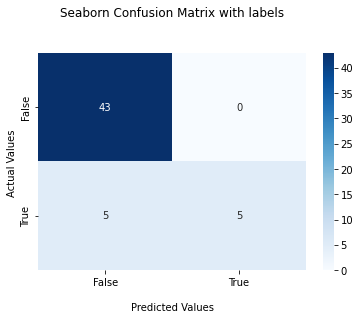

In [12]:

ax = sns.heatmap(confusion_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');


ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])


plt.show()

# Report

In [13]:
from sklearn.metrics import classification_report
print(classification_report(Y_Test, Y_Pred))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95        43
           1       1.00      0.50      0.67        10

    accuracy                           0.91        53
   macro avg       0.95      0.75      0.81        53
weighted avg       0.92      0.91      0.89        53



# Visualization

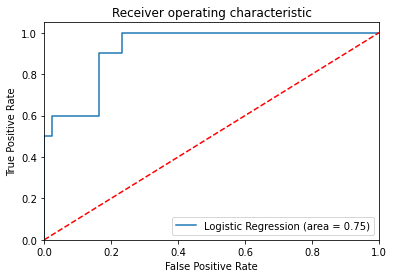

In [14]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(Y_Test, classifier.predict(X_Test))
fpr, tpr, thresholds = roc_curve(Y_Test, classifier.predict_proba(X_Test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# Linear Regression


In [15]:
x = df1.iloc[:, :-1].values
y = df1.iloc[:, 11].values

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=101)

In [17]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [18]:
predictions = lm.predict(X_test)

In [19]:
print('Accuracy of Multiple Linear Regression on test set: {:.2f}'.format(lm.score(X_test, y_test)))

Accuracy of Multiple Linear Regression on test set: 0.37


In [20]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.19021292063261383
MSE: 0.07140557134193874
RMSE: 0.26721820922597833


# Visualization

<BarContainer object of 84 artists>

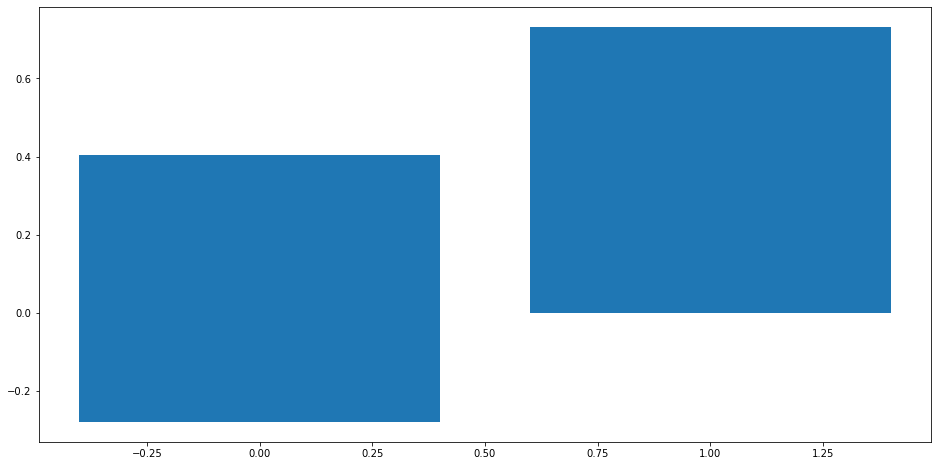

In [21]:
plt.figure(figsize=(16 ,8))

plt.bar(y_test,predictions)

C:\Users\ACER\AppData\Local\Temp/ipykernel_8652/618483325.py:5: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-o" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(y_test, y_test + 1, '-o' , linestyle='solid',label='y=2x+1', color='red')


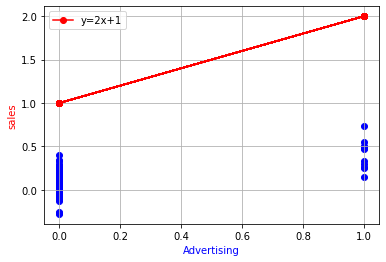

In [22]:
from matplotlib import pyplot as plt
plt.scatter(y_test, predictions, color='blue')
plt.xlabel('Advertising', color='blue')
plt.ylabel('sales', color='red')
plt.plot(y_test, y_test + 1, '-o' , linestyle='solid',label='y=2x+1', color='red')
plt.legend(loc='upper left')
plt.grid()
plt.show()

# Bayesian Regression

In [23]:
from sklearn.linear_model import BayesianRidge

In [24]:
x1 = df1.iloc[:, :-1].values
y1 = df1.iloc[:, 11].values

In [25]:
x_train, x_test, Y_train, Y_test = train_test_split(x1, y1, test_size = 0.15, random_state = 42)

In [26]:
model3 = BayesianRidge()
model3.fit(X_train, y_train)


BayesianRidge()

In [27]:
predictions1 = model3.predict(X_test)

In [28]:
print('Accuracy of Bayesian on test set: {:.2f}'.format(model3.score(x_test, Y_test)))

Accuracy of Bayesian on test set: 0.25


# Random Forest

In [29]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np
regressor1 = RandomForestRegressor(n_estimators = 100, random_state = 0)
model5 = regressor1.fit(x1, y1) 

In [30]:
print('Accuracy of Random Forest Decision Tree on test set: {:.2f}'.format(model5.score(x1,y1)))

Accuracy of Random Forest Decision Tree on test set: 0.92


# Bias Variance

In [31]:
avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(
 regressor1, X_train, y_train, X_test, y_test,
 loss='0-1_loss',
 random_seed=123)


In [32]:
print('Average expected loss: %.3f' % avg_expected_loss)
print('Average bias: %.3f' % avg_bias)
print('Average variance: %.3f' % avg_var)

Average expected loss: 0.128
Average bias: 0.131
Average variance: 0.003
